# Regression Week 4: Ridge Regression (gradient descent)

In this notebook, you will implement ridge regression via gradient descent. You will:
* Convert an data frame into a Numpy array
* Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
* Write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

In [11]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from math import log

# Load in house sales data

In [39]:
# Load all dataset
sales = pd.read_csv('kc_house_data.csv')
# Load the traiing dataset
train_data = pd.read_csv('kc_house_train_data.csv')
# Load the test dataset
test_data = pd.read_csv('kc_house_test_data.csv')

In [19]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Import useful functions from previous notebook

Now we will write a function that will accept an DataFrame, a list of feature names (e.g. ['sqft_living', 'bedrooms']) and an target feature e.g. ('price') and will return two things:
A numpy matrix whose columns are the desired features plus a constant column (this is how we create an 'intercept')
A numpy array containing the values of the output

In [20]:
def get_numpy_data(df, features, output):
    df['constant'] = 1 # this is how you add a constant column to an DataFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of DataFrame given by the features list into the DataFrame features_df (now including constant):
    features_df = df[features]
    # the following line will convert the features_df into a numpy matrix:
    feature_matrix = features_df.values
    # assign the column of data frame associated with the output to the Array output_sarray
    output_sarray = df[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.values
    return(feature_matrix, output_array)

A function to predict output given regression weights

In [21]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights) #this is equal to feture_matrix multiply weights
    return(predictions)

# Computing the Derivative

5.. We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.

Cost(w)
= SUM[ (prediction - output)^2 ] + l2_penalty*(w[0]^2 + w[1]^2 + ... + w[k]^2).


Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) as we did in the notebook for the unregularized case in Module 2 and add the derivative of the regularization part. As we saw, the derivative of the RSS with respect to w[i] can be written as:

2*SUM[ error*[feature_i] ]

The derivative of the regularization term with respect to w[i] is:

2*l2_penalty*w[i]

Summing both, we get

2*SUM[ error*[feature_i] ] + 2*l2_penalty*w[i]

That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus 2*l2_penalty*w[i].

IMPORTANT: We will not regularize the constant. Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the 2*l2_penalty*w[0] term).

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus 2*l2_penalty*w[i].



**We will not regularize the constant.** Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the 2*l2_penalty*w[0] term).

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus 2*l2_penalty*w[i].

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).  To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call `feature_is_constant` which you should set to `True` when computing the derivative of the constant and `False` otherwise.

**From week two:**

We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

(w[0]\*[CONSTANT] + w[1]\*[feature_1] + ... + w[i] \*[feature_i] + ... +  w[k]\*[feature_k] - output)^2

Where we have k features and a constant. So the derivative with respect to weight w[i] by the chain rule is:

2\*(w[0]\*[CONSTANT] + w[1]\*[feature_1] + ... + w[i] \*[feature_i] + ... +  w[k]\*[feature_k] - output)\* [feature_i]

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

2\*error\*[feature_i]

That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors. 

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).

In [22]:
#derivative = 2SUM[ error[feature_i] ] + 2l2_penaltyw[i]
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2*np.dot(errors,feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2*np.dot(errors,feature) + 2*l2_penalty*weight 
    return derivative

7.. To test your feature derivative function, run the following:

In [23]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (np.sum(errors*example_features[:,1])*2+20.)
print ('')

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2.)

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


In [24]:
my_weights

array([  1.,  10.])

8.. Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.

The amount by which we move in the negative gradient direction is called the ‘step size’. We stop when we are ‘sufficiently close’ to the optimum. Unlike in Module 2, this time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, write a gradient descent function using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria. The function will take the following parameters:

2D feature matrix

array of output values

initial weights

step size

L2 penalty

maximum number of iterations

To make your job easier, we provide a skeleton in Python:

In [82]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    
    #while not reached maximum number of iterations:
    while iteration < max_iterations:
        iteration += 1  # increment iteration counter
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        ### === end code section ===
        
        # compute the predictions using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        
        # compute the errors as predictions - output
        errors = predictions - output
    
        # from time to time, print the value of the cost function
        if iteration%print_frequency==0:
            print ('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                derivative = 2*np.dot(errors,feature_matrix[:,i])
            # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
            else:
                derivative = 2*np.dot(errors,feature_matrix[:,i]) + 2*l2_penalty*weights[i] 
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size * derivative
    print ('Done with gradient descent at iteration ', iteration)
    print ('Learned weights = ', weights)
    return weights

# Visualizing effect of L2 penalty

9.. The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature.

features: ‘sqft_living’

output: ‘price’

11.. Convert the training set and test set using the ‘get_numpy_data’ function.e.g. in Python:

In [58]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

12.. First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm to learn the weights of the simple model (described above). Use the following parameters:

step_size = 1e-12

max_iterations = 1000

initial_weights = all zeros

Store the learned weights as simple_weights_0_penalty

In [71]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.array([0., 0.])
l2_penalty = 0.0

In [83]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
simple_weights_0_penalty

Iteration = 1
Cost function =  7.43305185234e+15
Iteration = 2
Cost function =  5.39426721353e+15
Iteration = 3
Cost function =  4.02323773629e+15
Iteration = 4
Cost function =  3.1012561833e+15
Iteration = 5
Cost function =  2.4812476436e+15
Iteration = 6
Cost function =  2.0643080768e+15
Iteration = 7
Cost function =  1.78392709616e+15
Iteration = 8
Cost function =  1.59537820185e+15
Iteration = 9
Cost function =  1.4685839897e+15
Iteration = 10
Cost function =  1.38331819009e+15
Iteration = 20
Cost function =  1.21156213902e+15
Iteration = 30
Cost function =  1.20831376121e+15
Iteration = 40
Cost function =  1.20825232478e+15
Iteration = 50
Cost function =  1.20825116214e+15
Iteration = 60
Cost function =  1.20825113944e+15
Iteration = 70
Cost function =  1.2082511383e+15
Iteration = 80
Cost function =  1.20825113757e+15
Iteration = 90
Cost function =  1.20825113685e+15
Iteration = 100
Cost function =  1.20825113613e+15
Iteration = 200
Cost function =  1.2082511289e+15
Iteration = 3

array([ -1.63113515e-01,   2.63024369e+02])

we’ll use them later.

13.. Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above. Call your weights: simple_weights_high_penalty.

In [84]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.array([0., 0.])
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Iteration = 1
Cost function =  7.43305185234e+15
Iteration = 2
Cost function =  5.61830389891e+15
Iteration = 3
Cost function =  4.9206132783e+15
Iteration = 4
Cost function =  4.65238194268e+15
Iteration = 5
Cost function =  4.54925876403e+15
Iteration = 6
Cost function =  4.50961239088e+15
Iteration = 7
Cost function =  4.49437005028e+15
Iteration = 8
Cost function =  4.48850998402e+15
Iteration = 9
Cost function =  4.48625698852e+15
Iteration = 10
Cost function =  4.48539075267e+15
Iteration = 20
Cost function =  4.48484886803e+15
Iteration = 30
Cost function =  4.48484788047e+15
Iteration = 40
Cost function =  4.48484693107e+15
Iteration = 50
Cost function =  4.48484598168e+15
Iteration = 60
Cost function =  4.48484503229e+15
Iteration = 70
Cost function =  4.48484408289e+15
Iteration = 80
Cost function =  4.4848431335e+15
Iteration = 90
Cost function =  4.48484218411e+15
Iteration = 100
Cost function =  4.48484123471e+15
Iteration = 200
Cost function =  4.48483174081e+15
Iteration

we’ll use them later.

14.. If you have access to matplotlib, the following piece of code will plot the two learned models. (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

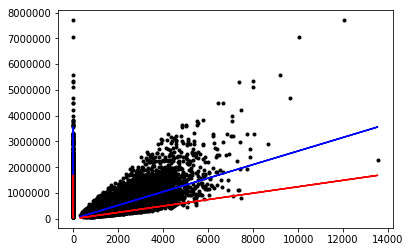

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

15.. Quiz Question: What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

#Answer: [-1.63113515e-01,   2.63024369e+02]
[   9.76730382  124.57217567]

16.. Quiz Question: Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?

#Answer: lines with no regularization is more steeper

17.. Compute the RSS on the TEST data for the following three sets of weights:

The initial weights (all zeros)

The weights learned with no regularization

The weights learned with high regularization


18.. Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

#RSS based on initial weights

In [92]:
#convert test data to matrix
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

#set weights
weights = np.array([0., 0.])

# compute the predictions using your predict_output() function
predictions = predict_output(simple_test_feature_matrix, weights)

# compute the errors as predictions - output
errors = predictions - test_output

# compute RSS
RSS = (errors*errors).sum()

print('RSS on initial weights:', RSS)

RSS on initial weights: 1.78427328614e+15


#RSS based no regularization weights

In [91]:
#convert test data to matrix
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

#set weights
weights = simple_weights_0_penalty

# compute the predictions using your predict_output() function
predictions = predict_output(simple_test_feature_matrix, weights)

# compute the errors as predictions - output
errors = predictions - test_output

# compute RSS
RSS = (errors*errors).sum()

print('RSS on simple_weights_0_penalty:', RSS)

RSS on simple_weights_0_penalty: 2.75723632154e+14


#RSS based regularization weights

In [90]:
#convert test data to matrix
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

#set weights
weights = simple_weights_high_penalty

# compute the predictions using your predict_output() function
predictions = predict_output(simple_test_feature_matrix, weights)

# compute the errors as predictions - output
errors = predictions - test_output

# compute RSS
RSS = (errors*errors).sum()

print('RSS on simple_weights_high_penalty:', RSS)

RSS on simple_weights_high_penalty: 6.9464210149e+14


# Running a multiple regression with L2 penalty

19.. Let us now consider a model with 2 features: [ ‘sqft_living’, ‘sqft_living_15’]. First, create Numpy version of your training and test data with the two features.

In [95]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

We need to re-inialize the weights, since we have one extra parameter. Let us also set the step size and maximum number of iterations.

In [96]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

First, let's consider no regularization.  Set the `l2_penalty` to `0.0` and run your ridge regression algorithm to learn the weights of your model.  Call your weights:

`multiple_weights_0_penalty`

In [97]:
l2_penalty = 0.0

In [98]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Iteration = 1
Cost function =  7.43305185234e+15
Iteration = 2
Cost function =  4.05675233205e+15
Iteration = 3
Cost function =  2.52956511453e+15
Iteration = 4
Cost function =  1.8385566943e+15
Iteration = 5
Cost function =  1.52567557515e+15
Iteration = 6
Cost function =  1.38378949857e+15
Iteration = 7
Cost function =  1.31923260615e+15
Iteration = 8
Cost function =  1.28964887188e+15
Iteration = 9
Cost function =  1.27588472391e+15
Iteration = 10
Cost function =  1.2692788074e+15
Iteration = 20
Cost function =  1.25781238602e+15
Iteration = 30
Cost function =  1.25195457086e+15
Iteration = 40
Cost function =  1.24675542266e+15
Iteration = 50
Cost function =  1.24213950817e+15
Iteration = 60
Cost function =  1.23804140048e+15
Iteration = 70
Cost function =  1.23440301274e+15
Iteration = 80
Cost function =  1.2311727742e+15
Iteration = 90
Cost function =  1.22830489923e+15
Iteration = 100
Cost function =  1.22575873839e+15
Iteration = 200
Cost function =  1.21173888029e+15
Iteration 

Next, let's consider high regularization.  Set the `l2_penalty` to `1e11` and run your ridge regression algorithm to learn the weights of your model.  Call your weights:

`multiple_weights_high_penalty`

In [99]:
l2_penalty = 1e11
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [100]:
multiple_weights_high_penalty=ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Iteration = 1
Cost function =  7.43305185234e+15
Iteration = 2
Cost function =  4.46048979092e+15
Iteration = 3
Cost function =  3.79667446933e+15
Iteration = 4
Cost function =  3.64831953088e+15
Iteration = 5
Cost function =  3.61509110365e+15
Iteration = 6
Cost function =  3.60760274294e+15
Iteration = 7
Cost function =  3.60588632259e+15
Iteration = 8
Cost function =  3.60547487496e+15
Iteration = 9
Cost function =  3.60536516819e+15
Iteration = 10
Cost function =  3.60532940261e+15
Iteration = 20
Cost function =  3.60529428145e+15
Iteration = 30
Cost function =  3.60529353769e+15
Iteration = 40
Cost function =  3.60529308317e+15
Iteration = 50
Cost function =  3.60529263153e+15
Iteration = 60
Cost function =  3.60529217992e+15
Iteration = 70
Cost function =  3.6052917283e+15
Iteration = 80
Cost function =  3.60529127669e+15
Iteration = 90
Cost function =  3.60529082507e+15
Iteration = 100
Cost function =  3.60529037346e+15
Iteration = 200
Cost function =  3.60528585733e+15
Iteratio

22.. Quiz Question: What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

#Answer: 243.05416982   
91.48927365

Compute the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization

Which weights perform best?

24.. Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

1..RSS based on The initial weights (all zeros)

In [101]:
#set weights
weights = initial_weights

# compute the predictions using your predict_output() function
predictions = predict_output(test_feature_matrix, weights)

# compute the errors as predictions - output
errors = predictions - test_output

# compute RSS
RSS = (errors*errors).sum()

print('RSS on initial_weights:', RSS)

RSS on initial_weights: 1.78427328614e+15


2..RSS based on The weights learned with no regularization

In [106]:
#set weights
weights = multiple_weights_0_penalty

# compute the predictions using your predict_output() function
predictions = predict_output(test_feature_matrix, weights)

# compute the errors as predictions - output
errors = predictions - test_output

# compute RSS
RSS = (errors*errors).sum()

print('RSS on the weights learned with no regularization:', RSS)

RSS on the weights learned with no regularization: 2.74067615919e+14


3..RSS based on The weights learned with high regularization

In [105]:
#set weights
weights = multiple_weights_high_penalty

# compute the predictions using your predict_output() function
predictions = predict_output(test_feature_matrix, weights)

# compute the errors as predictions - output
errors = predictions - test_output

# compute RSS
RSS = (errors*errors).sum()

print('RSS on the weights learned with high regularization:', RSS)

RSS on the weights learned with high regularization: 5.00404800501e+14


Predict the house price for the 1st house in the test set using the no regularization and high regularization models. (Remember that python starts indexing from 0.) How far is the prediction from the actual price?  Which weights perform best for the 1st house?

26.. Quiz Question: What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?

In [107]:
test_feature_matrix

array([[   1, 1430, 1780],
       [   1, 2950, 2140],
       [   1, 1710, 1030],
       ..., 
       [   1, 2520, 2520],
       [   1, 2310, 1830],
       [   1, 1020, 1020]])

In [116]:
test_feature_matrix[0]

array([   1, 1430, 1780])

In [109]:
test_data[model_features]

,sqft_living,sqft_living15
0,1430,1780
1,2950,2140
2,1710,1030
3,2320,2580
4,1090,1570
5,2620,2620
6,4220,2410
7,2250,2250
8,1260,1290
9,2750,1510


In [120]:
#set weights
weights = multiple_weights_0_penalty

# compute the predictions using your predict_output() function
predictions = predict_output(test_feature_matrix[0], weights)

# compute the errors as predictions - output
errors = predictions - test_output[0]

print('errors on 0 penalty for 1st house:', errors)

errors on 0 penalty for 1st house: 77465.4760582


In [121]:
#set weights
weights = multiple_weights_high_penalty

# compute the predictions using your predict_output() function
predictions = predict_output(test_feature_matrix[0], weights)

# compute the errors as predictions - output
errors = predictions - test_output[0]

print('errors on high penalty for 1st house:', errors)

errors on high penalty for 1st house: -39546.4696781
